In [58]:
import numpy as np
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
sys.path.insert(1, module_path + '/src')

import utility
import sktime
from sktime.utils.data_io import load_from_tsfile_to_dataframe
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sktime.transformations.panel.catch22_features import Catch22

from sklearn.metrics import accuracy_score, classification_report

from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix

#from sktime.classification.compose import TimeSeriesForestClassifier

import time as time
from sklearn.preprocessing import MinMaxScaler



# Trying catch22 on a permutation of the dataset

In [46]:
X_train, y_train = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_TRAIN.ts')
X_test, y_test = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_TEST.ts')
X_val, y_val = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_VAL.ts')


labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)


start = time.time()
c22f = Catch22()
c22f.fit(X_train , y_train)

X_train_t = c22f.transform(X_train)
X_test_t = c22f.transform(X_test)
X_val_t = c22f.transform(X_val)

time_used = time.time() - start
print(f'Time to extract features: {time_used}')

scaler = MinMaxScaler()

scaler.fit(X_train_t)
X_train_t = scaler.transform(X_train_t)
X_test_t = scaler.transform(X_test_t)
X_val_t = scaler.transform(X_val_t)

Time to extract features: 57.06494426727295


Comment out the last line in the code below to run the 

## Random Forest

In [48]:
parameters = {
'n_estimators'      : [100,200,300],
'max_depth'         : [8, 10, 12],
'random_state'      : [0]}

grid = GridSearchCV(RandomForestClassifier(), parameters, cv=5).fit(X_train_t,y_train)

0.7510548523206751


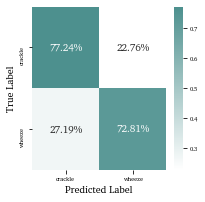

In [49]:
clf = grid.best_estimator_
clf.fit(X_train_t,y_train)
y_pred = clf.predict(X_test_t)

figure_path = module_path + '/figures/small_segment_dataset_plots/'

f, ax = utility.plot_cm(y_test, y_pred, module_path = module_path, class_names = labels, color_index = 7)

f.savefig(figure_path + f'cm_simpleCatch22_2class.pdf', bbox_inches='tight')

print(accuracy_score(y_test, y_pred))

# KNN

In [50]:
leaf_size = list(range(1,5))
n_neighbors = list(range(1,3))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn= KNeighborsClassifier()


grid = GridSearchCV(knn, hyperparameters, cv=5).fit(X_train_t,y_train)

0.620253164556962


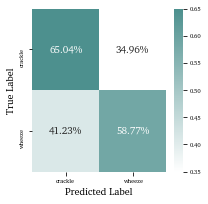

In [51]:
clf = grid.best_estimator_
clf.fit(X_train_t,y_train)
y_pred = clf.predict(X_test_t)

figure_path = module_path + '/figures/small_segment_dataset_plots/'

f, ax = utility.plot_cm(y_test, y_pred, module_path = module_path, class_names = labels, color_index = 7)

f.savefig(figure_path + f'cm_simpleCatch22_2class.pdf', bbox_inches='tight')

print(accuracy_score(y_test, y_pred))

## ANN

In [52]:
parameter_space = {
'hidden_layer_sizes': [(1000,500), (1000,500, 250)],
'activation': [ 'relu'],
'solver': ['adam'],
'alpha': [0.0001, 0.05]}
grid = GridSearchCV(MLPClassifier(), parameter_space, cv=5).fit(X_train_t,y_train)

/home/andrine/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/andrine/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.759493670886076


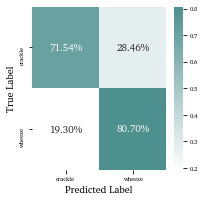

In [53]:
clf = grid.best_estimator_
clf.fit(X_train_t,y_train)
y_pred = clf.predict(X_test_t)

figure_path = module_path + '/figures/small_segment_dataset_plots/'

f, ax = utility.plot_cm(y_test, y_pred, module_path = module_path, class_names = labels, color_index = 7)

f.savefig(figure_path + f'cm_simpleCatch22_2class.pdf', bbox_inches='tight')

print(accuracy_score(y_test, y_pred))

## SVM

In [54]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
          'kernel': ['rbf']}  

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0, cv = 5).fit(X_train_t,y_train)

              precision    recall  f1-score   support

     crackle       0.79      0.76      0.77       123
      wheeze       0.75      0.78      0.76       114

    accuracy                           0.77       237
   macro avg       0.77      0.77      0.77       237
weighted avg       0.77      0.77      0.77       237



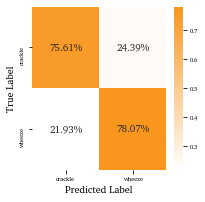

In [59]:
clf = grid.best_estimator_
clf.fit(X_train_t,y_train)
y_pred = clf.predict(X_test_t)

figure_path = module_path + '/figures/small_segment_dataset_plots/'

f, ax = utility.plot_cm(y_test, y_pred, module_path = module_path, class_names = labels, color_index = 2)

f.savefig(figure_path + f'cm_simpleCatch22_2class.pdf', bbox_inches='tight')

print(classification_report(y_test, y_pred))

## 3 class classification

In [60]:
X_train, y_train = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_TRAIN.ts')
X_test, y_test = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_TEST.ts')
X_val, y_val = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_VAL.ts')


labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)


start = time.time()
c22f = Catch22()
c22f.fit(X_train , y_train)

X_train_t = c22f.transform(X_train)
X_test_t = c22f.transform(X_test)
X_val_t = c22f.transform(X_val)

time_used = time.time() - start
print(f'Time to extract features: {time_used}')

scaler = MinMaxScaler()

scaler.fit(X_train_t)
X_train_t = scaler.transform(X_train_t)
X_test_t = scaler.transform(X_test_t)
X_val_t = scaler.transform(X_val_t)

['crackle' 'normal' 'wheeze'] [438 418 431]
Time to extract features: 86.62669515609741


              precision    recall  f1-score   support

     crackle       0.62      0.64      0.63       111
      normal       0.49      0.59      0.54       105
      wheeze       0.62      0.50      0.55       128

    accuracy                           0.57       344
   macro avg       0.58      0.58      0.57       344
weighted avg       0.58      0.57      0.57       344



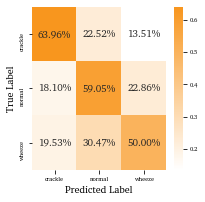

In [61]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
          'kernel': ['rbf']}  

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0, cv = 5).fit(X_train_t,y_train)

clf = grid.best_estimator_
clf.fit(X_train_t,y_train)
y_pred = clf.predict(X_test_t)

figure_path = module_path + '/figures/small_segment_dataset_plots/'

f, ax = utility.plot_cm(y_test, y_pred, module_path = module_path, class_names = labels, color_index = 2)

f.savefig(figure_path + f'cm_simpleCatch22_3class.pdf', bbox_inches='tight')

print(classification_report(y_test, y_pred))